In [1]:
import tensorflow as tf
import os

In [2]:
# limiting the tensorflow gpu memory usage (to resolve OOM error)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import  imghdr

In [4]:
data_dir = 'data'
img_exts = ['jpeg','jpg','bmp','png']

In [5]:
os.listdir(os.path.join(data_dir, "happy"))

['images26.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 '05-12-21-happy-people.jpg',
 'GettyImages-871518740-1024x707.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'how-happy-are-healthy-people.jpg',
 'physed-happiness-facebookJumbo.jpg',
 '170404-happy-workers-feature.jpg',
 'image18.jpeg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'images31.jpg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 'habits-that-define-very-happy-people.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 '1902587.jpg',
 'o-HAPPY-facebook.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 'happy-people-13772392.jpg',
 'images30.jpg',
 'image15.jpeg',
 'young-and-happy-people-vector-15114154.jpg',
 'maxresdefault2.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'happy-people-1024x768.jpeg',
 '1902540.jpg',
 'hqdefault.jpg',
 'image19.jpeg',
 'images36.jpg',
 'images22.jpg',
 'tmp_6mv7xy_5d5b15258a50

In [6]:
print(len(os.listdir(os.path.join(data_dir, "happy"))))
print(len(os.listdir(os.path.join(data_dir, "sad"))))

101
69


In [7]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
.DS_Store
sad


In [8]:
for image_class in os.listdir(data_dir):
    if image_class==".DS_Store":
        pass
    else:
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try:
                # reading the image file
                img = cv2.imread(image_path)

                #getting the image extensrion
                tip = imghdr.what(image_path)

                #cheching if it exists
                if tip not in img_exts:
                    print("Image not in extensions list {}".format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print("Issue with the image file {}".format(image_path))


In [9]:
tf.data.Dataset??


Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
tf.keras.utils.image_dataset_from_directory??


Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [12]:
# loading the dataset using Dataset 
data = tf.keras.utils.image_dataset_from_directory('data')


Found 170 files belonging to 2 classes.


2024-09-04 15:19:19.191008: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-09-04 15:19:19.191032: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-04 15:19:19.191035: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-04 15:19:19.191221: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-04 15:19:19.191235: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
data_iterator = data.as_numpy_iterator()


In [15]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x363d5c070>)

In [16]:
batch = data_iterator.next()

In [17]:
batch

(array([[[[ 21.888672 ,  30.925781 ,  60.148438 ],
          [ 18.44336  ,  28.777344 ,  64.890625 ],
          [ 13.443359 ,  27.185547 ,  72.       ],
          ...,
          [ 32.628906 ,  32.628906 ,  70.62891  ],
          [ 33.       ,  33.       ,  69.22266  ],
          [ 33.       ,  33.       ,  69.       ]],
 
         [[ 21.888672 ,  29.738777 ,  58.389168 ],
          [ 18.570778 ,  26.488281 ,  62.029297 ],
          [ 15.331165 ,  25.002666 ,  68.92631  ],
          ...,
          [ 32.162823 ,  32.05664  ,  70.269005 ],
          [ 32.427734 ,  32.427734 ,  68.65039  ],
          [ 32.427734 ,  32.427734 ,  68.427734 ]],
 
         [[ 23.356182 ,  29.436436 ,  56.78711  ],
          [ 21.186634 ,  25.670635 ,  59.53959  ],
          [ 21.79464  ,  24.519531 ,  65.98067  ],
          ...,
          [ 31.867725 ,  31.161232 ,  69.76616  ],
          [ 32.       ,  31.425781 ,  68.44584  ],
          [ 32.       ,  31.425781 ,  68.28711  ]],
 
         ...,
 
         [[ 

In [18]:
print(f"the batch length is :{len(batch)}")
print(f"no of elenment in a batch {len(batch[0])}")
print(f"the shape of each image is {batch[0].shape}")

the batch length is :2
no of elenment in a batch 32
the shape of each image is (32, 256, 256, 3)


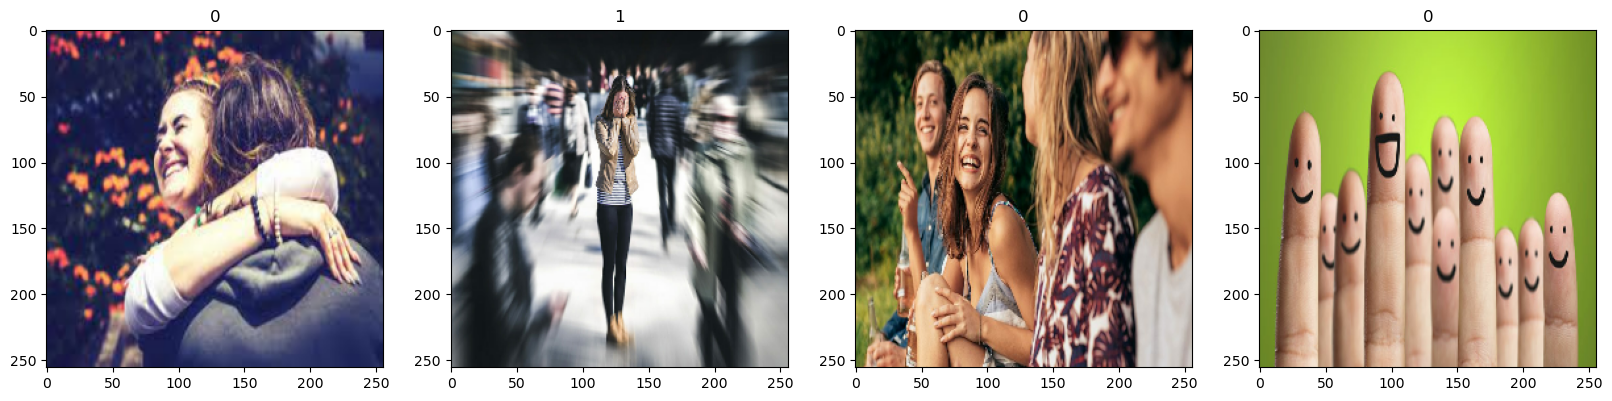

In [19]:
# class 1 = sad
# class 0 = happy
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2 data preprocessing

In [20]:
data = data.map(lambda x,y:(x/255,y))


In [21]:
scaled_iterator = data.as_numpy_iterator()


In [22]:
batch = scaled_iterator.next()

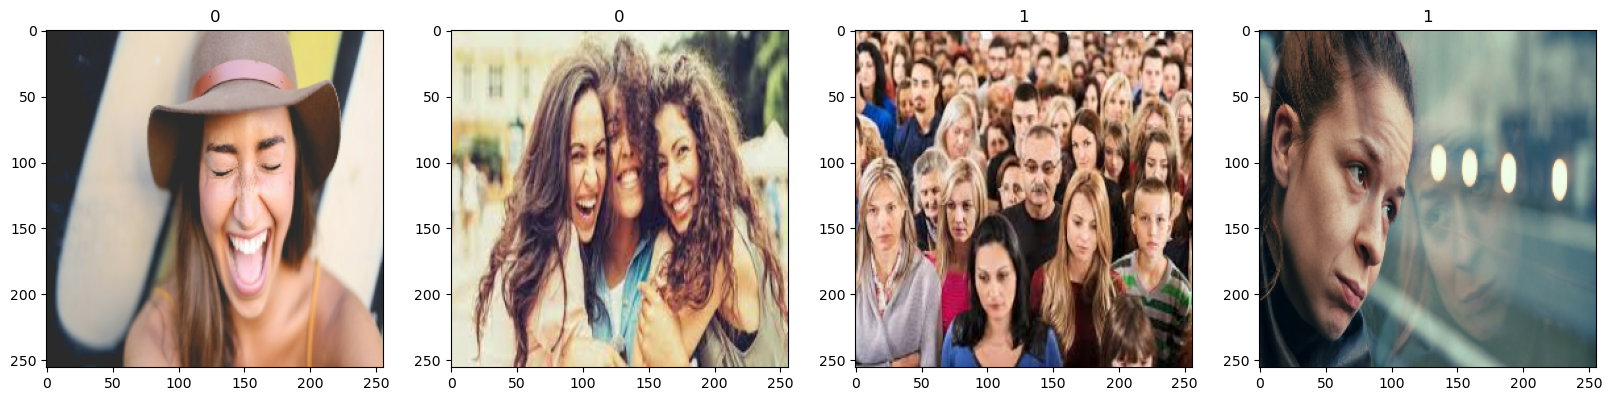

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 2.2)spliting the dataset

In [24]:
print(f"the total number of batches {len(data)}")

the total number of batches 6


In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1
print(f"train_size : {train_size}")
print(f"val_size : {val_size}")
print(f"test_size : {test_size}")


train_size : 4
val_size : 1
test_size : 1


In [26]:
train = data.take(train_size)
val = data.take(val_size)
test = data.take(test_size)
print(f"train size : {len(train)}")
print(f"val size : {len(val)}")
print(f"test size : {len(test)}")

train size : 4
val size : 1
test size : 1


# 3) building the model

# 3.1) model building

In [27]:
#importing the dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf

In [28]:
model = Sequential()


#adding the layers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 3.2) model traning

In [31]:
log_dir = 'logs'
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [32]:
# model traing
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callbacks])


Epoch 1/20


2024-09-04 15:19:21.767885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.4771 - loss: 2.4160 - val_accuracy: 0.5000 - val_loss: 1.0523
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.4219 - loss: 1.0045 - val_accuracy: 0.5312 - val_loss: 0.7252
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.5490 - loss: 0.6999 - val_accuracy: 0.5625 - val_loss: 0.6446
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.6094 - loss: 0.6408 - val_accuracy: 0.5938 - val_loss: 0.6013
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 0.5938 - loss: 0.6437 - val_accuracy: 0.7500 - val_loss: 0.5133
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.6490 - loss: 0.5523 - val_accuracy: 0.8438 - val_loss: 0.4430
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.7323 - loss: 0.5174 - val_accuracy: 0.7812 - val_loss: 0.4587
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.7885 - loss: 0.4911 - val_accuracy: 0.8750 - val_loss: 0.5291
Epoc

In [33]:
hist.history

{'accuracy': [0.5234375,
  0.4765625,
  0.5859375,
  0.6171875,
  0.65625,
  0.6328125,
  0.7734375,
  0.765625,
  0.8671875,
  0.796875,
  0.84375,
  0.8671875,
  0.8984375,
  0.921875,
  0.953125,
  0.9375,
  0.9375,
  0.9921875,
  1.0,
  0.9921875],
 'loss': [2.405874490737915,
  0.8649284839630127,
  0.6711564064025879,
  0.635223925113678,
  0.6217591762542725,
  0.5567116737365723,
  0.5155698657035828,
  0.5070230960845947,
  0.40533947944641113,
  0.3785264492034912,
  0.34736108779907227,
  0.30696845054626465,
  0.28529688715934753,
  0.2359134703874588,
  0.1903006136417389,
  0.1650947481393814,
  0.16174882650375366,
  0.09053240716457367,
  0.07632860541343689,
  0.07657603919506073],
 'val_accuracy': [0.5,
  0.53125,
  0.5625,
  0.59375,
  0.75,
  0.84375,
  0.78125,
  0.875,
  0.84375,
  0.78125,
  0.90625,
  0.90625,
  0.90625,
  0.96875,
  0.90625,
  0.9375,
  0.96875,
  0.96875,
  1.0,
  1.0],
 'val_loss': [1.0523147583007812,
  0.7251623868942261,
  0.64463788270950

# 3.3) performace plot

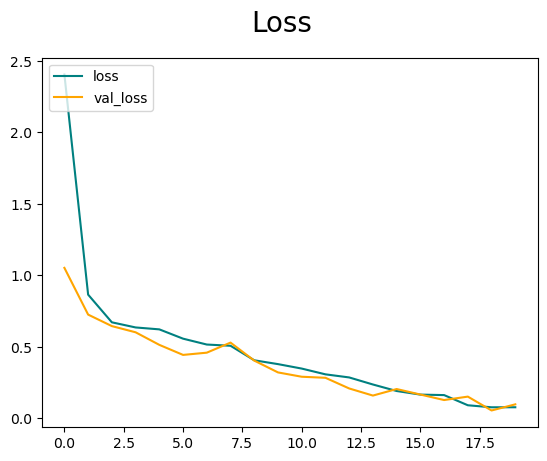

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

# 4) evaluation

# 4.1) evaluate

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


2024-09-04 15:23:35.681523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [41]:
print(f" precesioin result : {pre.result().numpy()}, recall result : {re.result().numpy()}, accuracy result : {acc.result().numpy()}")

 precesioin result : 1.0, recall result : 1.0, accuracy result : 1.0


# 4.2) Test

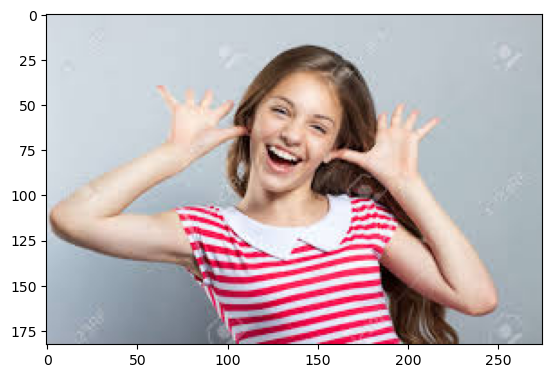

In [67]:
img = cv2.imread("images.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


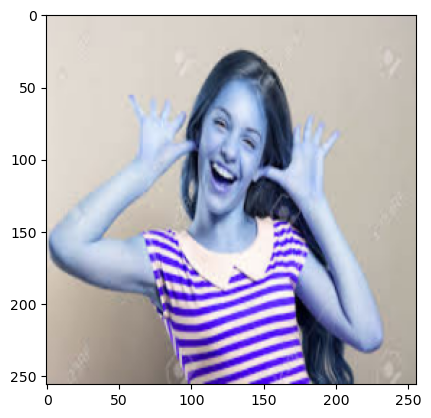

In [68]:
resize_image = tf.image.resize(img, (256,256))
plt.imshow(resize_image.numpy().astype(int))
plt.show()

In [69]:
yhat = model.predict(np.expand_dims(resize_image/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [70]:
if yhat>0.5:
    print("happy")
else:
    print("sad")

happy
